In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

In [8]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
len(dataset)

400

In [6]:
dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
dataset.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [14]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

### Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\EL MAHDI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Fitting Logistic Regression to Training set
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
classifier = LogisticRegression(random_state=0)

In [26]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Prediction the Test set results

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [29]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

### Making the confusion matrix
###### evaluating what we predicted well and what we did wrong

In [30]:
from sklearn.metrics import confusion_matrix   ### function confusion_matrix no capital letters !!!

In [31]:
cm = confusion_matrix(y_true = y_test, y_pred= y_pred)

In [32]:
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

###### 65+24 = 89 correct predictions, 8+3=11 incorrect ones. this just a step for evaluation we gonna use some graphs for deep conclusions

### Visualizing the Training set results

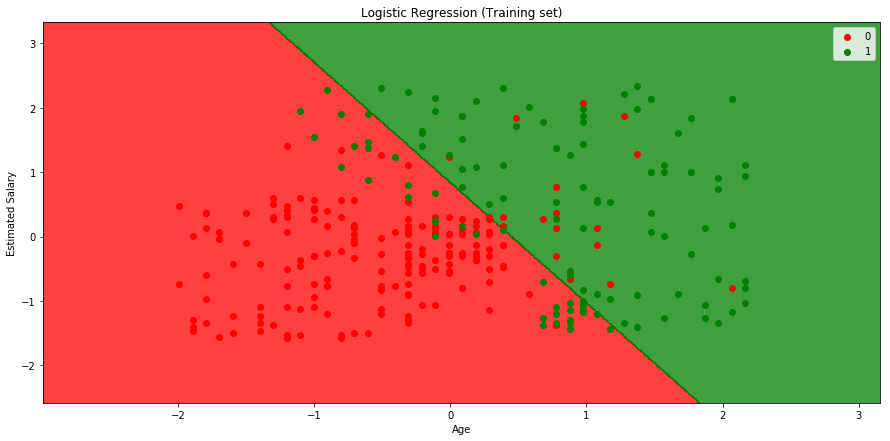

In [53]:
from matplotlib.colors import ListedColormap ### class to colorize all data points
X_set, y_set = X_train, y_train   ### local variables to replace X_train and y_train to avoid replacing too many times x_train

## now we prepare the grid with all pixels (salary, age) of the frame. we gonna apply the classifier on each pixel
## X_set[:, 0].min() X_set[:, 0].max()  min and max of the age, X_set[:, 1].min() X_set[:, 1].min() min max of the salary
## np.arange to create a range from min to max with a step=0.01 of higher resolution so the plot can be that dense (continuous)
XX1 = np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01)
XX2 = np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)

## create a grid of pixels
X1, X2 = np.meshgrid(XX1, XX2)

plt.figure(figsize=(15,7))

## contourf function to create the contour / boundary between regions
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max()) ### limit of the age axis
plt.ylim(X2.min(), X2.max()) ### limit of the salary axis
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

well lets see what we ve got here:
###### 1- the points represent the real training set observations, most of older people with higher salary bought the new mercedes, most of the young didn't. some young with high salary purchase the offer. 
###### 2- we have two regions. these are what our classifier predicted, the green region people who respond (or will) positively to the offer, the red region who didn't. The regions represent the model not the truth.
###### 3- the prediction boundary is a straight line, not randomly, well that's because our logistic regression classifier is linear. simply when we are in 2-D and the classifier is linear, we expect a straight line, in 3-D it will be a straight plane separating two spaces. if the classifier is nonlinear then the prediction boundaries won't be a straight line anymore.
###### 4- we can see some red points in the green area, and other green points in the red area, those are incorrect predictions. they are due specifically to the fact that our classifier is linear and that our users are not linearly distributed

### Visualizing the Test set results

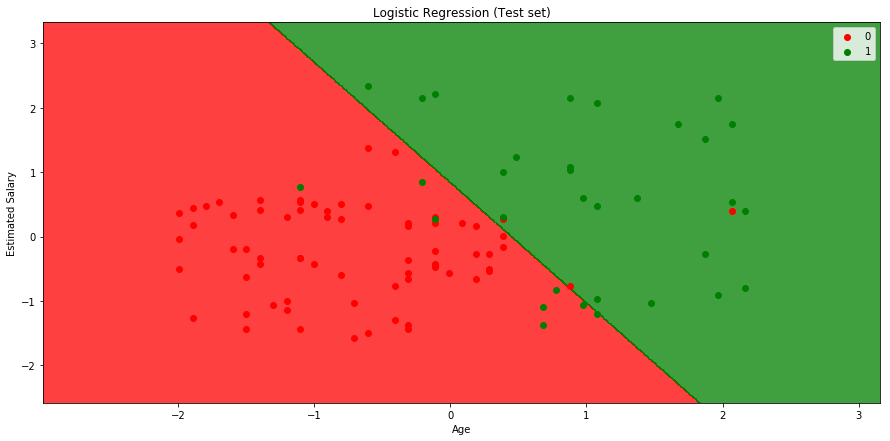

In [54]:
X_set, y_set = X_test, y_test
XX1 = np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01)
XX2 = np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)
X1, X2 = np.meshgrid(XX1, XX2)
plt.figure(figsize=(15,7))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

well it's pretty good actually, the users who refused the purchase are in the red region, the clients who positively answered the offer are in the green area. of coure there are some mistakes due to the linear nature of our classifier but that's fine (the incorrect predictions that we saw in the confusion matrix).